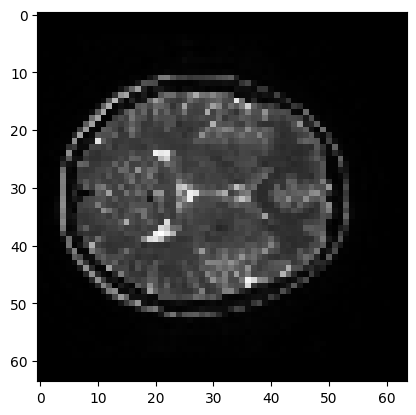

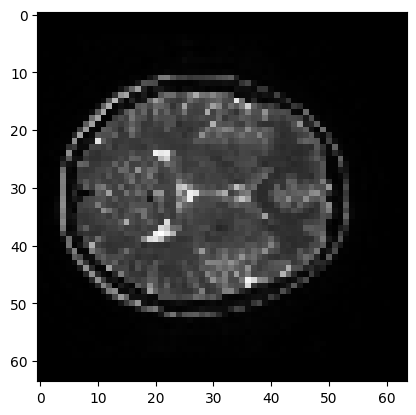

C:\Users\zt_no\AppData\Local\Temp\ipykernel_21716\2950670401.py:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m)


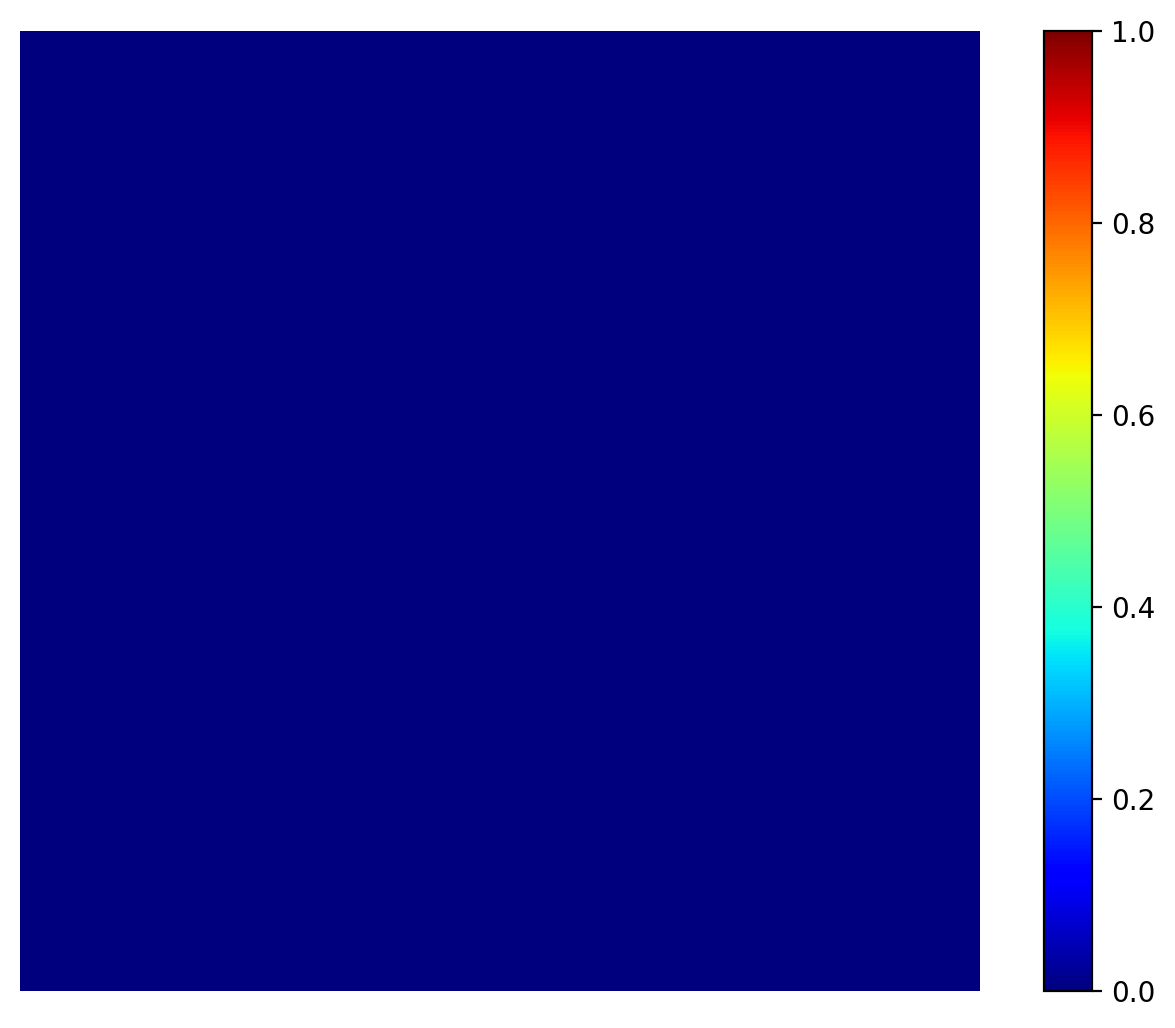

In [2]:
from PIL import Image
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
import  matplotlib
from PIL import Image
from skimage import io, transform, color
 
# 1.读取gt图片，并转为灰度图像
rgbImg=cv2.imread('./experiments\\ixi\\IXIresult\\0_1_hr.png')
img_gt=cv2.cvtColor(rgbImg, cv2.COLOR_BGR2GRAY)
 
# 2.读取生成的图片，并转为灰度图像
rgb = io.imread('./experiments\\ixi\\IXIresult\\0_1_sr.png')  # 读取图片
img_pred = color.rgb2gray(rgb)
 
 
# 3.开始进行制作误差热力图
A_img = img_gt
B_img = img_pred
 
#选取需要计算差值的两幅图片
dimg1 = A_img[:, :]
#归一化
dimg1_2 = np.zeros(dimg1.shape, dtype=np.float32)
cv2.normalize(dimg1, dimg1_2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# 显示选取的图像
plt.figure()
plt.imshow(dimg1_2, cmap='gray')
plt.show()
 
dimg2 = B_img[:, :]
dimg2_2 = np.zeros(dimg2.shape, dtype=np.float32)
cv2.normalize(dimg2, dimg2_2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.figure()
plt.imshow(dimg2_2,cmap='gray')
plt.show()
 
d = abs(dimg1_2-dimg2_2)*1
 
fig = plt.figure(dpi=200)
plt.figure(num=1)
cnorm = matplotlib.colors.Normalize(vmin=0, vmax=1)
m = matplotlib.cm.ScalarMappable(norm=cnorm, cmap=matplotlib.cm.jet)
m.set_array(d)
plt.imshow(d, norm=cnorm, cmap="jet")
plt.axis("off")
plt.colorbar(m)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig('test.png' , bbox_inches='tight', dpi=400,pad_inches=0)

e:\Anaconda\envs\test\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
e:\Anaconda\envs\test\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
e:\Anaconda\envs\test\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


NameError: name 'plt' is not defined

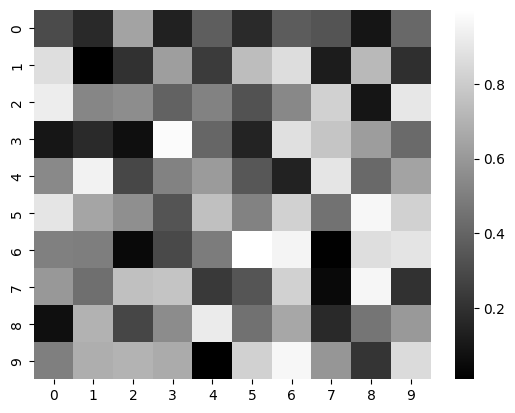

In [2]:
import seaborn as sns
import numpy as np

# 生成二维数组
data = np.random.rand(10, 10)

# 绘制热力图
sns.heatmap(data, cmap='gray')
plt.show()

In [1]:
pip install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/8f/2e/17bbb83fbf102687bb2aa3d808add39da820a7698159302a1a69bb82e01c/seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the two images
img1 = cv2.imread('./experiments/ttsr/2_hr.png')
img2 = cv2.imread('./experiments/ttsr/2_sr.png')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Calculate the difference between the images
diff = cv2.absdiff(gray1, gray2)

# Threshold the difference image
_, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# Find the contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img1, contours, -1, (0, 0, 255), 2)

# Display the images
cv2.imshow('Original Image', img1)
cv2.imshow('Difference Image', thresh)
cv2.imwrite('.//experiments//ttsr//errormap.png',thresh)
cv2.waitKey(0)


-1

In [25]:
import cv2
import numpy as np
from scipy import signal
from enum import Enum
from scipy.ndimage import uniform_filter
from skimage.metrics import structural_similarity

# 文章链接： https://blog.csdn.net/sinat_29957455/article/details/125119550


def mean_squared_error(img1, img2):
    """
    计算两张图片的MSE(mean squared error)：图像像素值的平方误差, 返回的第二个值是相似度
    """
    # 判断两张图片的shape是否一致
    assert img1.shape == img2.shape, "images have different shape {} and {}".format(
        img1.shape, img2.shape)
    # 计算两张图像的MSE
    img_mse = np.mean((img1.astype(np.float64) - img2.astype(np.float64))**2)
    # 将图像的MSE量化为相似度
    img_sim = img_mse / (255**2)
    return img_mse, 1 - img_sim


def root_mean_squared_error(img1, img2):
    """
    计算两张图片的RMSE(root mean squared error)：图像像素值的平方根误差，返回的第二个值是相似度
    """
    # 判断两张图片的shape是否一致
    assert img1.shape == img2.shape, "images have different shape " \
        "{} and {}".format(img1.shape, img2.shape)
    # 计算两张图像的MSE
    img_rmse = np.sqrt(
        np.mean((img1.astype(np.float64) - img2.astype(np.float64))**2))
    # 将图像的MSE量化为相似度
    img_sim = img_rmse / 255
    return img_rmse, 1 - img_sim


def peak_signal_noise_ratio(img1, img2):
    """
    PSNR(Peak Signal Noise Ratio)也叫峰值信噪比, PSNR的值越大表示图像越相似
    """
    # 判断两张图片的size是否一致
    assert img1.shape == img2.shape, "images hava different shape " \
        "{} and {}".format(img1.shape, img2.shape)
    # 获取数据类型所表示的最大值
    MAX = np.iinfo(img1.dtype).max
    # 计算两张图片的MSE
    mse, _ = mean_squared_error(img1, img2)
    # 计算两张图片的PSNR
    psnr = 10 * np.log10(MAX**2 / mse)

    return psnr


def filter2(img, fltr, mode='same'):
    return signal.convolve2d(img, np.rot90(fltr, 2), mode=mode)


def _get_sums(GT, P, win, mode='same'):
    mu1, mu2 = (filter2(GT, win, mode), filter2(P, win, mode))
    return mu1*mu1, mu2*mu2, mu1*mu2


def _get_sigmas(GT, P, win, mode='same', **kwargs):
    if 'sums' in kwargs:
        GT_sum_sq, P_sum_sq, GT_P_sum_mul = kwargs['sums']
    else:
        GT_sum_sq, P_sum_sq, GT_P_sum_mul = _get_sums(GT, P, win, mode)

    return filter2(GT*GT, win, mode) - GT_sum_sq,\
        filter2(P*P, win, mode) - P_sum_sq, \
        filter2(GT*P, win, mode) - GT_P_sum_mul


class Filter(Enum):
    UNIFORM = 0
    GAUSSIAN = 1


def fspecial(fltr, ws, **kwargs):
    if fltr == Filter.UNIFORM:
        return np.ones((ws, ws)) / ws**2
    elif fltr == Filter.GAUSSIAN:
        x, y = np.mgrid[-ws//2 + 1:ws//2 + 1, -ws//2 + 1:ws//2 + 1]
        g = np.exp(-((x**2 + y**2)/(2.0*kwargs['sigma']**2)))
        g[g < np.finfo(g.dtype).eps*g.max()] = 0
        assert g.shape == (ws, ws)
        den = g.sum()
        if den != 0:
            g /= den
        return g
    return None


def _ssim_single(GT, P, ws, C1, C2, fltr_specs, mode):
    win = fspecial(**fltr_specs)

    GT_sum_sq, P_sum_sq, GT_P_sum_mul = _get_sums(GT, P, win, mode)
    sigmaGT_sq, sigmaP_sq, sigmaGT_P = _get_sigmas(
        GT, P, win, mode, sums=(GT_sum_sq, P_sum_sq, GT_P_sum_mul))

    assert C1 > 0
    assert C2 > 0

    ssim_map = ((2 * GT_P_sum_mul + C1) * (2 * sigmaGT_P + C2)) / (
        (GT_sum_sq + P_sum_sq + C1) * (sigmaGT_sq + sigmaP_sq + C2))
    cs_map = (2 * sigmaGT_P + C2) / (sigmaGT_sq + sigmaP_sq + C2)

    return np.mean(ssim_map), np.mean(cs_map)


def ssim(GT, P, ws=11, K1=0.01, K2=0.03, MAX=None, fltr_specs=None, mode='valid'):
    '''
    SSIM(structural similarity index)结构相似性，SSIM的值越大，表示两个信号之间的相似度越高
    '''
    if MAX is None:
        MAX = np.iinfo(GT.dtype).max

    assert GT.shape == P.shape, "Supplied images have different sizes " + \
                                str(GT.shape) + " and " + str(P.shape)

    if fltr_specs is None:
        fltr_specs = dict(fltr=Filter.UNIFORM, ws=ws)

    C1 = (K1*MAX)**2
    C2 = (K2*MAX)**2

    ssims = []
    css = []
    for i in range(GT.shape[2]):
        ssim, cs = _ssim_single(
            GT[:, :, i], P[:, :, i], ws, C1, C2, fltr_specs, mode)
        ssims.append(ssim)
        css.append(cs)
    return np.mean(ssims), np.mean(css)


def _uqi_single(GT, P, ws):
    N = ws**2
    window = np.ones((ws, ws))

    GT_sq = GT*GT
    P_sq = P*P
    GT_P = GT*P

    GT_sum = uniform_filter(GT, ws)
    P_sum = uniform_filter(P, ws)
    GT_sq_sum = uniform_filter(GT_sq, ws)
    P_sq_sum = uniform_filter(P_sq, ws)
    GT_P_sum = uniform_filter(GT_P, ws)

    GT_P_sum_mul = GT_sum*P_sum
    GT_P_sum_sq_sum_mul = GT_sum*GT_sum + P_sum*P_sum
    numerator = 4*(N*GT_P_sum - GT_P_sum_mul)*GT_P_sum_mul
    denominator1 = N*(GT_sq_sum + P_sq_sum) - GT_P_sum_sq_sum_mul
    denominator = denominator1*GT_P_sum_sq_sum_mul

    q_map = np.ones(denominator.shape)
    index = np.logical_and((denominator1 == 0), (GT_P_sum_sq_sum_mul != 0))
    q_map[index] = 2*GT_P_sum_mul[index]/GT_P_sum_sq_sum_mul[index]
    index = (denominator != 0)
    q_map[index] = numerator[index]/denominator[index]

    s = int(np.round(ws/2))
    return np.mean(q_map[s:-s, s:-s])


def uqi(GT, P, ws=8):
    """
    UQI(Universal Quality Image Index)也叫图像通用质量指标，值越大，表示两个信号之间的相似度越高
    """
    if len(GT.shape) == 2:
        GT = GT[:, :, np.newaxis]
        P = P[:, :, np.newaxis]

    GT = GT.astype(np.float64)
    P = P.astype(np.float64)
    return np.mean([_uqi_single(GT[:, :, i], P[:, :, i], ws) for i in range(GT.shape[2])])

from PIL import Image
img1 = np.array(cv2.imread('.\\experiments/fastmri/3_hr.png'))
img2 = np.array(cv2.imread('.\\experiments/fastmri/3_sr.png'))
img2 = np.array(Image.fromarray(img2).resize((64//2,64//2), Image.BICUBIC))
img1 = np.array(Image.fromarray(img1).resize((64//2,64//2), Image.BICUBIC))
'''
MSE score ci_now2 is  (64.1930358270202, 0.9990127945278429)
MSE score 2559x1599 is  (68.08011955492424, 0.9989530162313737)
MSE score 2560x1600 is  (70.57878985164142, 0.9989145899292328)
==========
RMSE score ci_now2 is  (8.0120556555119, 0.9685801738999533)
RMSE score 2559x1599 is  (8.251067782712989, 0.9676428714403412)
RMSE score 2560x1600 is  (8.401118369100713, 0.9670544377682325)
==========
PSNR score ci_now2 is  30.055924459758682
PSNR score 2559x1599 is  29.800600511298292
PSNR score 2560x1600 is  29.644061532205544
==========
SSIM score ci_now2 is  (0.9863838184703861, 1.0242649298387507)
SSIM score 2559x1599 is  (0.9814506158341806, 0.9946554008887714)
SSIM score 2560x1600 is  (0.998377483710254, 0.9915163958460095)
==========
UQI score ci_now2 is  0.9671328167762927
UQI score 2559x1599 is  0.9662163173186169
UQI score 2560x1600 is  0.9657526370274786
'''
print("MSE score ci_now2 is ", mean_squared_error(img1, img2))
#print("MSE score 2559x1599 is ", mean_squared_error(img1, img3))
#print("MSE score 2560x1600 is ", mean_squared_error(img1, img4))
print("==========")
print("RMSE score ci_now2 is ", root_mean_squared_error(img1, img2))
#print("RMSE score 2559x1599 is ", root_mean_squared_error(img1, img3))
#print("RMSE score 2560x1600 is ", root_mean_squared_error(img1, img4))
print("==========")
print("PSNR score ci_now2 is ", peak_signal_noise_ratio(img1, img2))
#print("PSNR score 2559x1599 is ", peak_signal_noise_ratio(img1, img3))
#print("PSNR score 2560x1600 is ", peak_signal_noise_ratio(img1, img4))
print("==========")
print("SSIM score ci_now2 is ", ssim(img1, img2))
#print("SSIM score 2559x1599 is ", ssim(img1, img3))
#print("SSIM score 2560x1600 is ", ssim(img1, img4))
print("==========")
print("UQI score ci_now2 is ", uqi(img1, img2))
#print("UQI score 2559x1599 is ", uqi(img1, img3))
#print("UQI score 2560x1600 is ", uqi(img1, img4))



MSE score ci_now2 is  (32.453125, 0.9995009131103422)
RMSE score ci_now2 is  (5.6967644325529205, 0.9776597473233218)
PSNR score ci_now2 is  33.01823838316699
SSIM score ci_now2 is  (0.9882655788970554, 0.9905787726131511)
UQI score ci_now2 is  0.9896168758194507


C:\Users\zt_no\AppData\Local\Temp\ipykernel_8180\504952487.py:185: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  img2 = np.array(Image.fromarray(img2).resize((64//2,64//2), Image.BICUBIC))
C:\Users\zt_no\AppData\Local\Temp\ipykernel_8180\504952487.py:186: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  img1 = np.array(Image.fromarray(img1).resize((64//2,64//2), Image.BICUBIC))


In [2]:
import os
from imageio import imread
from PIL import Image
import numpy as np
import glob
import random
import cv2

import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
from importlib import import_module
from torch.utils.tensorboard import SummaryWriter

filename = './experiments/bicubic/IXI/1_sr.png'

HR = imread(filename)
# HR图像转为RGB格式
#HR = HR[:h//4*4, :w//4*4, :]
HR = cv2.cvtColor(HR,cv2.COLOR_BGR2RGB)
        
#HR = cv2.resize(HR, (64, 64))
h,w = HR.shape[:2]
### LR and LR_sr
# LR四倍下采样
LR = np.array(Image.fromarray(HR).resize((w//4, h//4), Image.BICUBIC))
# 将四倍下采样图像向上插值重建为原图像大小 LR上采样
LR_sr = np.array(Image.fromarray(LR).resize((w, h), Image.BICUBIC))
#LR_sr = LR_sr.astype(np.float32)
#LR_sr = LR_sr / 127.5 - 1.
#LR_sr = Image.fromarray(LR_sr)
#print(LR_sr)
#cv2.imwrite('testsets\Set5\HR//3.png', HR)
#cv2.imwrite('testsets\Set5\LR_bicubic\X2//3x2.png', LR)
cv2.imwrite('./experiments/bicubic/IXI/1_srx4.png', LR)
#LR_sr.save("./testsets/Sets/LR_bicubic/1.png")

C:\Users\zt_no\AppData\Local\Temp\ipykernel_20348\416022179.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  HR = imread(filename)
C:\Users\zt_no\AppData\Local\Temp\ipykernel_20348\416022179.py:30: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  LR = np.array(Image.fromarray(HR).resize((w//4, h//4), Image.BICUBIC))
C:\Users\zt_no\AppData\Local\Temp\ipykernel_20348\416022179.py:32: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  LR_sr = np.array(Image.fromarray(LR).resize((w, h), Image.BICUBIC))


True